In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
import numpy as np
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import data_accessor as acc
datas = [
    'temperature_230509_discrete',
    'pressure_230516_discrete'
    ]
data_dictionary = acc.setup(datas)

loading temperature_230509_discrete__________________________
	input shape (number, dimension): (6000, 10000)
	label shape (number, dimension): (6000, 1)
	there are 16 folds
	4200 for training, 600 for validating, 1200 for testing
loading pressure_230516_discrete__________________________
	input shape (number, dimension): (5000, 10000)
	label shape (number, dimension): (5000, 1)
	there are 16 folds
	3500 for training, 500 for validating, 1000 for testing


__________CROSS VALIDATION__________
Cross-validation rounds: 16
Epochs: 1000
Datas to learn: 
	0: temperature_230509_discrete
	1: pressure_230516_discrete
SINGLE TASK____________________________
we're learning: temperature_230509_discrete
>round 0
EARLY STOPPING @ epoch 23
min train loss: 0.00011370331743488681
min valid loss: 0.0001671509089646861


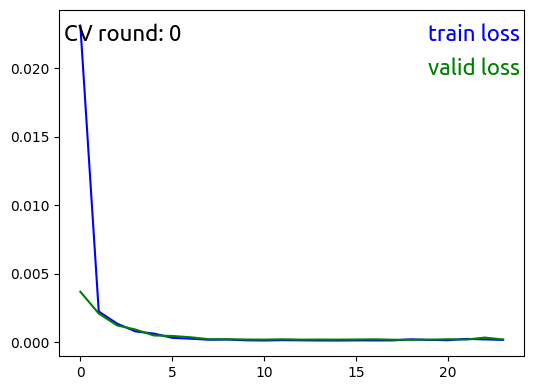

>round 1
EARLY STOPPING @ epoch 19
min train loss: 0.00010334399529242408
min valid loss: 8.900806788005866e-05


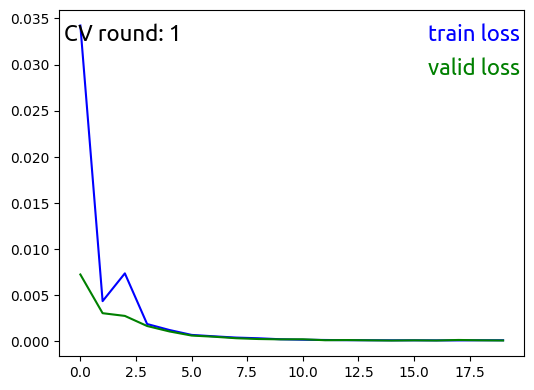

>round 2
EARLY STOPPING @ epoch 26
min train loss: 8.931432851320345e-05
min valid loss: 0.00017305142246186732


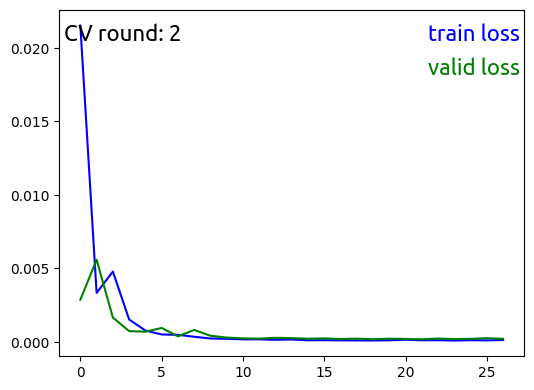

>round 3
EARLY STOPPING @ epoch 22
min train loss: 0.00012856726849956127
min valid loss: 0.00018154775025323034


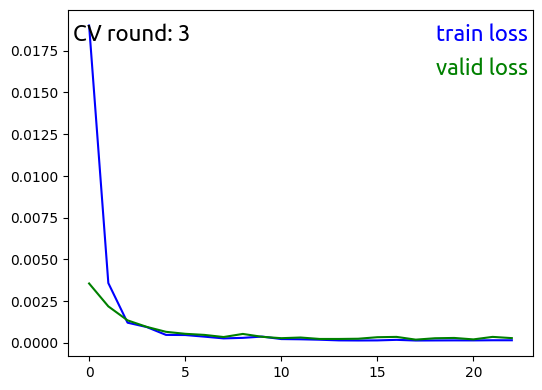

>round 4
EARLY STOPPING @ epoch 22
min train loss: 9.96831818845363e-05
min valid loss: 7.483700719603802e-05


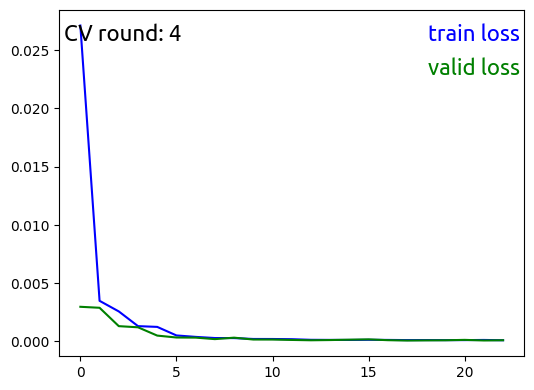

>round 5
EARLY STOPPING @ epoch 22
min train loss: 9.111345543439684e-05
min valid loss: 8.465996143058874e-05


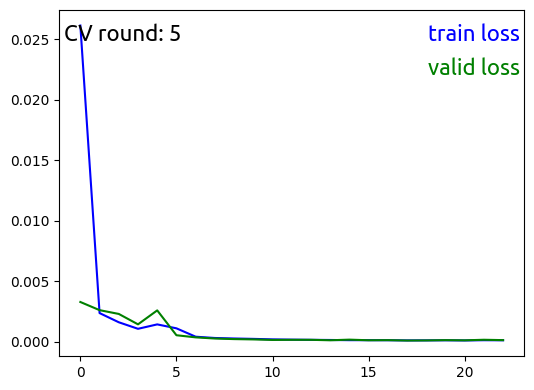

>round 6
EARLY STOPPING @ epoch 14
min train loss: 0.0001379226574279142
min valid loss: 0.00013314962416188791


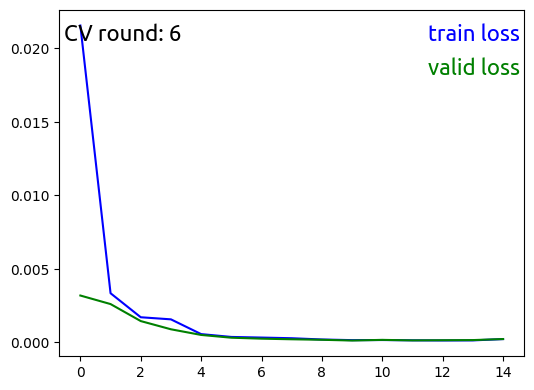

>round 7
EARLY STOPPING @ epoch 16
min train loss: 0.00011832596503540337
min valid loss: 0.0001486997767642606


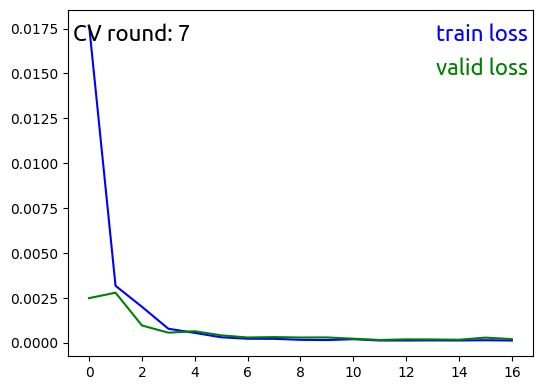

>round 8
EARLY STOPPING @ epoch 24
min train loss: 0.00011775345377497037
min valid loss: 0.00012262308737263084


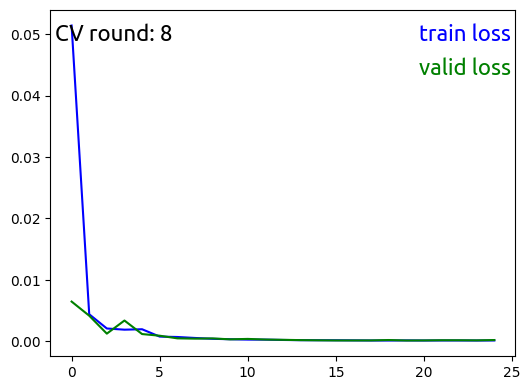

>round 9
EARLY STOPPING @ epoch 18
min train loss: 9.832304071592675e-05
min valid loss: 0.00013789402510155924


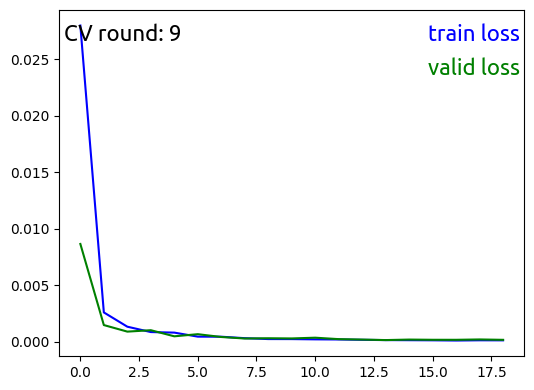

>round 10
EARLY STOPPING @ epoch 19
min train loss: 0.00012045023945437137
min valid loss: 0.00010654469660948962


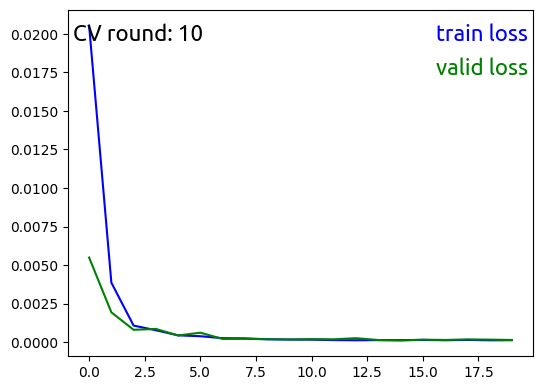

>round 11
EARLY STOPPING @ epoch 28
min train loss: 0.00011199237230881188
min valid loss: 0.0001656091306358576


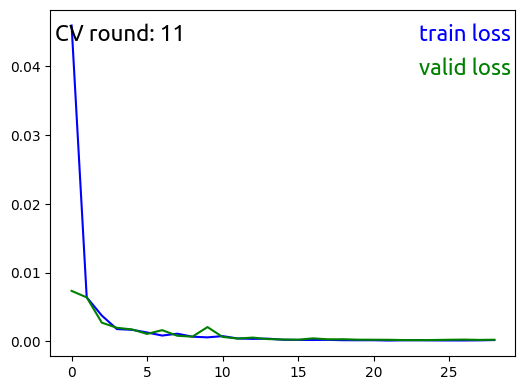

>round 12
EARLY STOPPING @ epoch 21
min train loss: 9.242498576482335e-05
min valid loss: 0.0001041487204929581


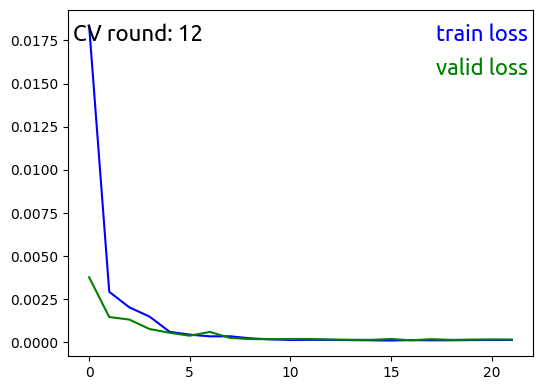

>round 13
EARLY STOPPING @ epoch 30
min train loss: 8.839945445343443e-05
min valid loss: 8.33268954011146e-05


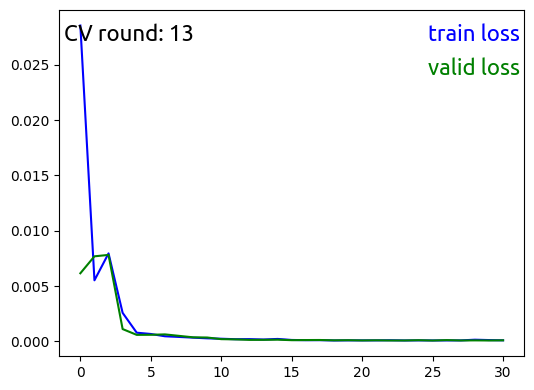

>round 14
EARLY STOPPING @ epoch 28
min train loss: 9.63535126312777e-05
min valid loss: 8.535938504792285e-05


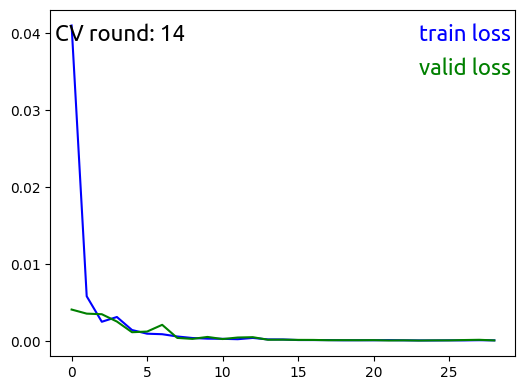

>round 15
EARLY STOPPING @ epoch 25
min train loss: 0.00010117433085917693
min valid loss: 0.00011359463896951639


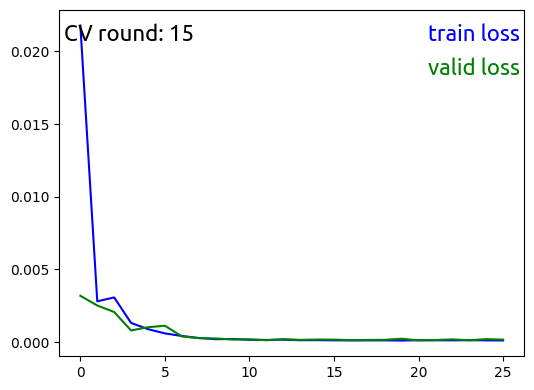

BEST model: CV=4.pth with 7.483700719603802e-05
trained on temperature_230509_discrete
Aggregate performance: Valid loss mean 0.0001232003186714792, std 3.476089190646317e-05
😇 TRAINing COMPLETE____________________________
TEST____________________________
Testing temperature_230509_discrete, loss:  0.00011702158984630124
Testing pressure_230516_discrete, loss:  4.142457470297813


In [3]:
from CrossValidation import CrossValidator
from tools import SaveBestCrossValidationModel
from Triplet_TCN import TripletAux_and_TCNDataset, TripletAux_and_TCNManager
from data import alternate_rows_itertools
s = {
    'problem'           : "regression",
    'approach'          : "metric learning/non-parametric",
    'algorithm'         : "triplet network",
    'input'             : "samples from a distribution",
    'input type'        : "vectors",
    'input meaning'     : "spectrum", 
    'input dimension'   : 10000,
    'input channels'    : 1,
    'output'            : "samples from a distribution",
    'output type'       : "one number",
    'output meaning'    : "temperature or pressure, depending on distribution",
    'output dimension'  : 1,
    'learning rate'     : 1e-4, # was 1e-4
    'feature dimension' : 300,
    'cross validation round': 16,
    'cross validation round-development' : 2,
    'epoch'             : 1000,
    'epoch-development' : 20,
    'batch size'        : 64,
    'number of convolution levels': 3,
    'best model folder' : 'triplet_best_model/'
}
# datas.reverse()
CVtor = CrossValidator(saver=SaveBestCrossValidationModel(s['best model folder']), 
                       dataset=TripletAux_and_TCNDataset,
                       datas=datas,
                       data_dictionary=data_dictionary,
                       manager=TripletAux_and_TCNManager,
                       settings=s,
                       device=device,
                       dev=False)
CVtor.single_task_train(0)
# CVtor.multi_task_train_sequential()
# CVtor.multi_task_train_weave(alternate_rows_itertools) 
CVtor.complete_notify()
CVtor.test_all()